# House Price Analysis
## Load necessary libraries and import project dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data
dataset = pd.read_excel("HousePricePrediction.xlsx")


# Quick EDA
print(dataset.head(5))
print(dataset.shape)


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
(2919, 13)


## Data Preprocessing

In [37]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


## Exploratory Data Analysis

<Axes: >

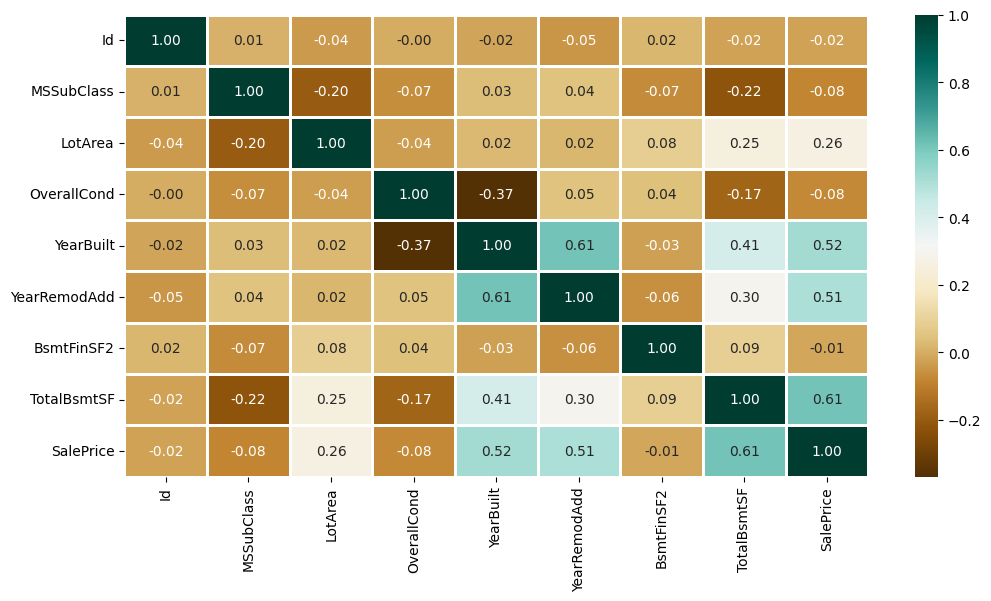

In [38]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

The heatmap shows correlation between variables within the dataset. To explore the categorical variables, it will be helpful to use barplots.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

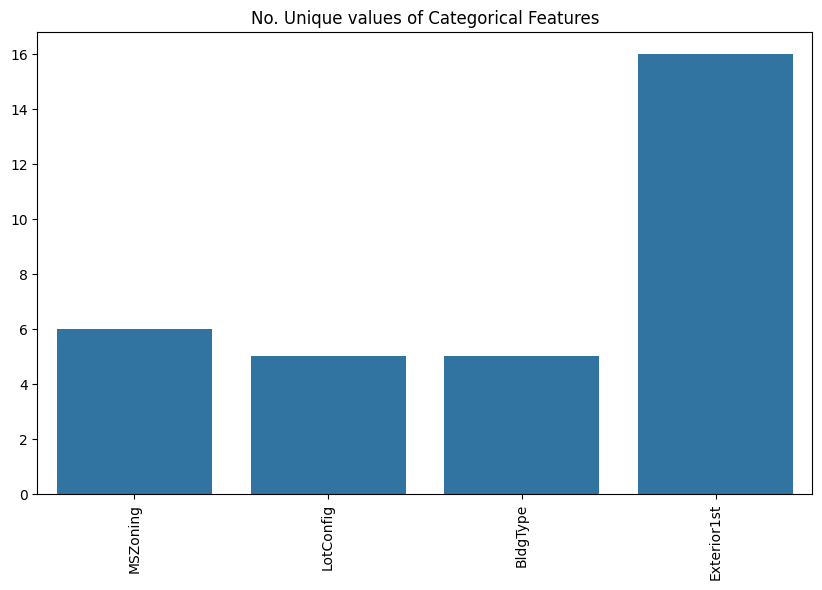

In [39]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

The barplot shows 16 unique values within exterior1st, while the other variables have only 5-6 unique values each. To explore the distribution of values within each variable, we can show a histogram of each variable separately.

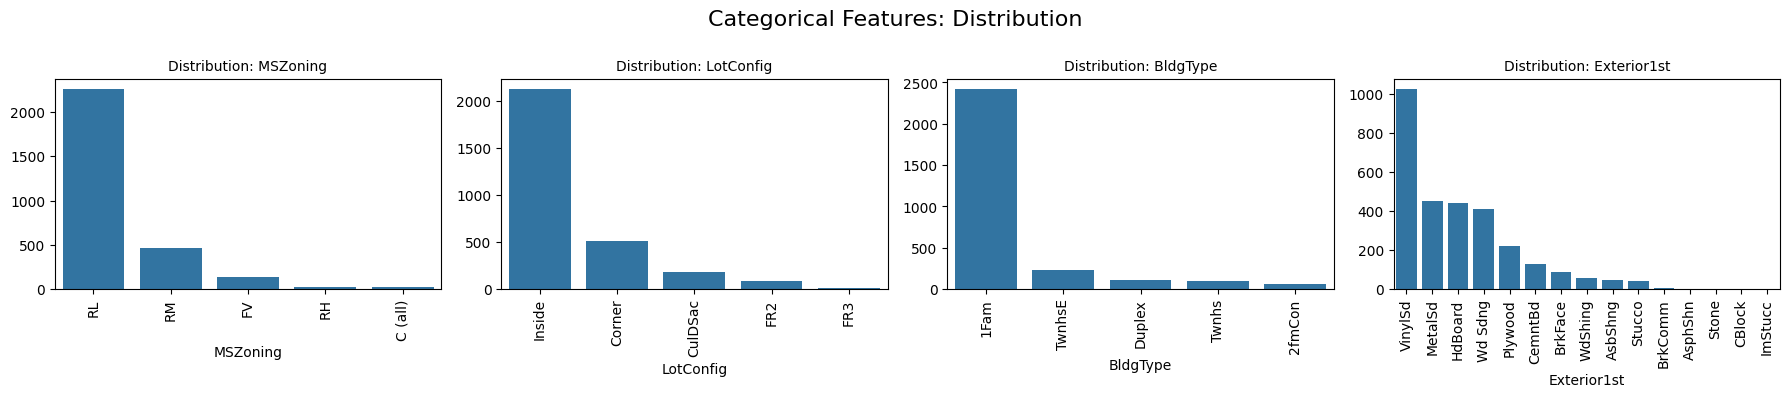

In [40]:
plt.figure(figsize=(18, 36))
index = 1

for col in object_cols:
    plt.subplot(11, 4, index)
    sns.barplot(x=dataset[col].value_counts().index, 
                y=dataset[col].value_counts().values)
    plt.title(f'Distribution: {col}', fontsize=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    index += 1

plt.suptitle('Categorical Features: Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Make room for the suptitle
plt.show()

## Data Cleaning

The Id column is not being used in prediction, so the column can be removed from the dataset.

In [41]:
dataset.drop(['Id'], axis=1, inplace=True)

Additionally, there are empty values within the SalePrice variable. To keep the distribution of the data symmetric, we fill all empty values with the mean SalePrice.

In [42]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [43]:
dataset.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

There are still variables with null values, so we drop records with null values.

In [44]:
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## OneHotEncoder

We will use One Hot Encoding to convert categorical variables into binary matrices to be used for machine learning.

In [47]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [49]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)